# Churn analysis with $Logistic$ $Regression$

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, log_loss, accuracy_score, confusion_matrix, precision_score, recall_score
 
# importing machine learning models for prediction
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_excel('./data/Telco_customer_churn.xlsx')
df.head(3)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved


In [3]:
print('columns', df.columns)
print('\n\nshape of the data frame:\n', df.shape)

columns Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')


shape of the data frame:
 (7043, 33)


In [4]:
df=df.convert_dtypes()

In [5]:
for col in df.columns:
    if len(df[col].unique()) ==1:
        print(col)
        print(df[col].unique())
        df.drop(col, axis=1, inplace=True)

Count
<IntegerArray>
[1]
Length: 1, dtype: Int64
Country
<StringArray>
['United States']
Length: 1, dtype: string
State
<StringArray>
['California']
Length: 1, dtype: string


In [6]:
for col in df.columns:
    if df[col].isna().sum() != 0:
        print('The percentage of nas in ', col,' column:\n', round(df[col].isna().sum()/len(df)*100,2),'%')

The percentage of nas in  Churn Reason  column:
 73.46 %


In [7]:
df['Churn Reason'] = df['Churn Reason'].fillna('Not Mentioned')
print(df['Churn Reason'].unique())

<StringArray>
[             'Competitor made better offer',
                                     'Moved',
             'Competitor had better devices',
 'Competitor offered higher download speeds',
              'Competitor offered more data',
                            'Price too high',
                   'Product dissatisfaction',
                   'Service dissatisfaction',
           'Lack of self-service on Website',
                       'Network reliability',
                 'Limited range of services',
  'Lack of affordable download/upload speed',
                     'Long distance charges',
                        'Extra data charges',
                                "Don't know",
          'Poor expertise of online support',
           'Poor expertise of phone support',
              'Attitude of service provider',
                'Attitude of support person',
                                  'Deceased',
                             'Not Mentioned']
Length: 21, dtype: s

In [8]:
print('shape of dataframe:\n\n', df.shape, '\n\n')
df.info()

shape of dataframe:

 (7043, 30) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   string 
 1   City               7043 non-null   string 
 2   Zip Code           7043 non-null   Int64  
 3   Lat Long           7043 non-null   string 
 4   Latitude           7043 non-null   Float64
 5   Longitude          7043 non-null   Float64
 6   Gender             7043 non-null   string 
 7   Senior Citizen     7043 non-null   string 
 8   Partner            7043 non-null   string 
 9   Dependents         7043 non-null   string 
 10  Tenure Months      7043 non-null   Int64  
 11  Phone Service      7043 non-null   string 
 12  Multiple Lines     7043 non-null   string 
 13  Internet Service   7043 non-null   string 
 14  Online Security    7043 non-null   string 
 15  Online Backup      7043 non-null   s

In [9]:
print('Percentage of Churn:\n\n', np.round(len(df[df['Churn Value']==1])/len(df)*100, 2),'%')

Percentage of Churn:

 26.54 %


In [10]:
numeric_df = df.select_dtypes(include=np.number)
object_df = df.select_dtypes(include=['object', 'bool', 'string'])

print('numeric dataframe shape:\n\n', numeric_df.shape)
print('objective dataframe size:\n\n', object_df.shape)


numeric_df['Total Charges']=pd.to_numeric(object_df['Total Charges'], errors='coerce')
numeric_df['Total Charges'] = numeric_df['Total Charges'].fillna(0)
object_df.drop('Total Charges', axis=1, inplace=True)

numeric dataframe shape:

 (7043, 8)
objective dataframe size:

 (7043, 22)


In [11]:
object_df_to_numeric = object_df.apply(preprocessing.LabelEncoder().fit_transform)
object_df_to_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CustomerID         7043 non-null   int64
 1   City               7043 non-null   int64
 2   Lat Long           7043 non-null   int64
 3   Gender             7043 non-null   int64
 4   Senior Citizen     7043 non-null   int64
 5   Partner            7043 non-null   int64
 6   Dependents         7043 non-null   int64
 7   Phone Service      7043 non-null   int64
 8   Multiple Lines     7043 non-null   int64
 9   Internet Service   7043 non-null   int64
 10  Online Security    7043 non-null   int64
 11  Online Backup      7043 non-null   int64
 12  Device Protection  7043 non-null   int64
 13  Tech Support       7043 non-null   int64
 14  Streaming TV       7043 non-null   int64
 15  Streaming Movies   7043 non-null   int64
 16  Contract           7043 non-null   int64
 17  Paperless Bill

In [12]:
print(object_df['Churn Label'].value_counts(),'\n', object_df_to_numeric['Churn Label'].value_counts())

No     5174
Yes    1869
Name: Churn Label, dtype: Int64 
 0    5174
1    1869
Name: Churn Label, dtype: int64


In [13]:
df_final = pd.concat([object_df_to_numeric, numeric_df], axis=1)
df_final.shape

(7043, 30)

In [14]:
df_final=df_final.drop('Churn Value', axis=1)

In [15]:
df_final.columns

Index(['CustomerID', 'City', 'Lat Long', 'Gender', 'Senior Citizen', 'Partner',
       'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Churn Label', 'Churn Reason', 'Zip Code', 'Latitude',
       'Longitude', 'Tenure Months', 'Monthly Charges', 'Churn Score', 'CLTV',
       'Total Charges'],
      dtype='object')

In [16]:
x = df_final.loc[:, df_final.columns != 'Churn Label']
y = df_final.loc[:, df_final.columns == 'Churn Label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

lr = LogisticRegression(solver='lbfgs', max_iter=10000)

lr.fit(X_train, y_train)

/home/mn/python-environments/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000)

In [18]:
y_pred = lr.predict(X_test)
probs = lr.predict_proba(X_test)
df_y_pred = pd.DataFrame(y_pred)
df_probs = pd.DataFrame(probs)

In [19]:
y_test = y_test.reset_index()
y_test = y_test.drop('index', axis=1)
y_test

,Churn Label
0,0
1,0
2,1
3,0
4,1
...,...
1404,0
1405,0
1406,0
1407,0


In [20]:
df_results = pd.concat([df_y_pred, y_test, df_probs], axis=1)

In [21]:
df_results.columns = ['prediction', 'true_value', 'prob_0', 'prob_1']

Text(0.5, 1.0, 'Accuracy Score: 0.948')

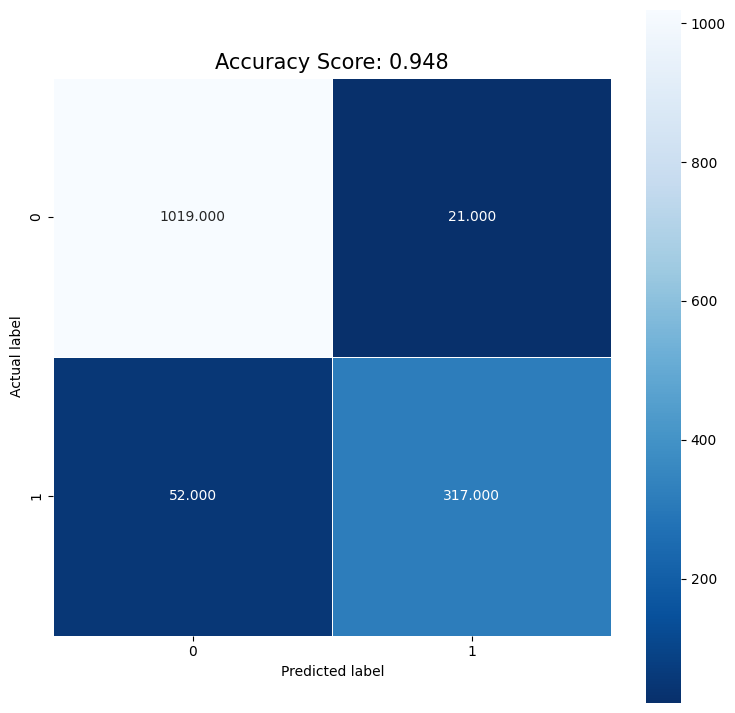

In [22]:
cm_matrix = confusion_matrix(y_test, df_y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(round(lr.score(X_test, y_test), 3))
plt.title(all_sample_title, size = 15)

In [23]:
print(f'Precision score is: {round(precision_score(y_test, y_pred), 3)}')
print(f'Recall score is: {round(recall_score(y_test, y_pred), 3)}')

Precision score is: 0.938
Recall score is: 0.859
